In [277]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error

In [286]:
n = 50  # increase, var goes down
x = np.random.rand(n) * 10
y = 5 + x**2 + np.random.randn(n) * 3  # decrease,
poly = PolynomialFeatures(10)  # increase, var goes up

In [287]:
X = poly.fit_transform(x.reshape(n, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_test = X_test[:, 1]

In [288]:
models = []
for i in range(10):
    X_sample, y_sample = resample(X_train, y_train)
    mdl = LinearRegression().fit(X_sample, y_sample)
    models.append(mdl)

10.627818012261505
10.627818012261503


<ErrorbarContainer object of 3 artists>

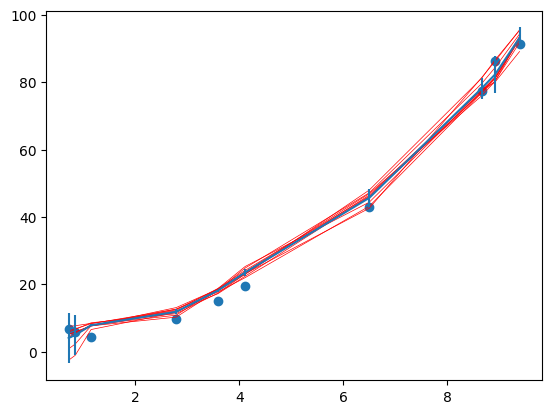

In [289]:
def sort_both(x, y):
    sort_inds = np.argsort(x)
    return x[sort_inds], y[sort_inds]


preds = np.zeros((10, y_test.size))
for i in range(10):
    y_pred = models[i].predict(X_test)
    preds[i, :] = y_pred

means = np.mean(preds, axis=0)
vars = np.var(preds, axis=0)

bias = np.mean((y_test - means) ** 2)
variance = np.mean(vars)
mse = np.mean((preds - y_test) ** 2)
print(bias + variance)
print(mse)

for i in range(10):
    y_pred = models[i].predict(X_test)
    plt.plot(*sort_both(x_test, y_pred), lw=0.5, color="red")
plt.scatter(*sort_both(X_test[:, 1], y_test))
# plt.scatter(*sort_both(X_train[:, 1], y_train))
sort_inds = np.argsort(x_test)
plt.errorbar(*sort_both(x_test, means), yerr=vars[sort_inds])

In [222]:
print(bias)

1.208056770498683


In [223]:
print(variance)

0.04148845722129501
